In [ ]:
!gdown --id 1wjkigPvylE5aisS6SRr16GZZwvNgKAl9

Downloading...
From: https://drive.google.com/uc?id=1wjkigPvylE5aisS6SRr16GZZwvNgKAl9
To: /content/training.zip
202MB [00:01, 103MB/s] 


In [ ]:
#!pip install patool
#!pip install pyunpack
import pyunpack
import os
import numpy as np 
local_zip = '/content/training.rar'
pyunpack.Archive(local_zip).extractall('/content')

In [ ]:
import pandas as pd 
train_data = pd.read_csv('/content/training_frames_keypoints.csv')

In [ ]:
train_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,62.0,130.0,66.0,134.0,73.0,136.0,81.0,139.0,92.0,134.0,96.0,130.0,98.0,126.0,102.0,120.0,102.0,111.0,104.0,105.0,104.0,99.0,102.0,90.0,51.0,89.0,56.0,87.0,60.0,...,68.0,119.0,73.0,117.0,77.0,115.0,79.0,117.0,81.0,115.0,85.0,117.0,90.0,117.0,87.0,122.0,85.0,124.0,81.0,124.0,77.0,124.0,73.0,121.0,70.0,119.0,77.0,119.0,79.0,119.0,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,58.0,130.0,64.0,136.0,73.0,141.0,85.0,143.0,96.0,137.0,102.0,131.0,107.0,124.0,109.0,114.0,111.0,105.0,111.0,97.0,111.0,88.0,111.0,78.0,51.0,83.0,56.0,81.0,62.0,...,70.0,122.0,75.0,122.0,81.0,120.0,83.0,120.0,85.0,120.0,90.0,120.0,94.0,120.0,90.0,124.0,87.0,126.0,83.0,126.0,79.0,126.0,75.0,124.0,70.0,122.0,79.0,122.0,83.0,122.0,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,60.0,111.0,62.0,116.0,67.0,122.0,75.0,127.0,86.0,127.0,96.0,123.0,105.0,121.0,113.0,114.0,118.0,106.0,122.0,100.0,124.0,91.0,128.0,81.0,58.0,56.0,62.0,54.0,67.0,...,67.0,103.0,69.0,101.0,73.0,101.0,75.0,101.0,77.0,101.0,84.0,103.0,88.0,108.0,82.0,110.0,77.0,110.0,75.0,110.0,71.0,110.0,69.0,107.0,67.0,103.0,73.0,103.0,75.0,105.0,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,61.0,141.0,64.0,148.0,73.0,157.0,85.0,163.0,101.0,163.0,116.0,164.0,128.0,161.0,137.0,155.0,144.0,143.0,150.0,134.0,156.0,121.0,162.0,109.0,70.0,68.0,76.0,65.0,85.0,...,76.0,129.0,82.0,130.0,88.0,127.0,91.0,130.0,98.0,130.0,104.0,133.0,110.0,139.0,101.0,142.0,95.0,145.0,88.0,142.0,82.0,142.0,79.0,139.0,76.0,129.0,85.0,133.0,91.0,133.0,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,71.0,136.0,75.0,138.0,81.0,141.0,92.0,143.0,105.0,139.0,113.0,135.0,122.0,129.0,126.0,122.0,128.0,112.0,130.0,103.0,130.0,95.0,130.0,86.0,58.0,81.0,60.0,74.0,64.0,...,75.0,121.0,79.0,117.0,84.0,115.0,86.0,115.0,90.0,113.0,96.0,115.0,103.0,118.0,98.0,122.0,92.0,124.0,88.0,124.0,84.0,126.0,79.0,124.0,77.0,121.0,84.0,117.0,88.0,117.0,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,Thomas_Ferguson_02.jpg,35.0,94.0,35.0,105.0,38.0,112.0,40.0,123.0,46.0,131.0,51.0,138.0,56.0,144.0,61.0,146.0,74.0,146.0,87.0,141.0,97.0,136.0,105.0,129.0,107.0,119.0,110.0,108.0,110.0,98.0,110.0,88.0,110.0,78.0,33.0,84.0,35.0,82.0,38.0,...,56.0,126.0,58.0,123.0,64.0,121.0,66.0,121.0,69.0,118.0,74.0,121.0,81.0,121.0,76.0,126.0,71.0,128.0,69.0,128.0,64.0,128.0,61.0,128.0,56.0,126.0,64.0,123.0,66.0,123.0,71.0,123.0,79.0,121.0,71.0,123.0,66.0,126.0,64.0,126.0
3458,Valerie_Harper_00.jpg,72.0,133.0,76.0,147.0,80.0,159.0,87.0,170.0,91.0,185.0,102.0,192.0,109.0,196.0,117.0,200.0,131.0,200.0,150.0,189.0,161.0,182.0,168.0,175.0,176.0,160.0,179.0,149.0,179.0,138.0,179.0,123.0,176.0,108.0,65.0,114.0,69.0,103.0,72.0,...,102.0,170.0,102.0,159.0,109.0,152.0,113.0,152.0,117.0,148.0,124.0,152.0,135.0,159.0,131.0,167.0,124.0,170.0,120.0,174.0,113.0,174.0,109.0,174.0,102.0,170.0,109.0,159.0,113.0,159.0,120.0,156.0,135.0,159.0,124.0,163.0,117.0,167.0,113.0,166.0
3459,Maggie_Smith_00.jpg,52.0,149.0,56.0,160.0,63.0,168.0,71.0,179.0,78.0,190.0,89.0,198.0,100.0,202.0,111.0,2

In [ ]:
temp = train_data.to_numpy()

In [ ]:
temp.shape

(3462, 137)

In [ ]:
base_dir = '/content/training/'
img_names = os.listdir(base_dir)
for i,j in enumerate(img_names):
    img_names[i] = '/content/training/' + j
print(img_names)

['/content/training/Harrison_Ford_52.jpg', '/content/training/Gabi_Zimmer_10.jpg', '/content/training/Maggie_Cheung_51.jpg', '/content/training/Olene_Walker_41.jpg', '/content/training/James_Wolfensohn_51.jpg', '/content/training/Mack_Brown_40.jpg', '/content/training/Carlos_Ghosn_12.jpg', '/content/training/Franz_Fischler_42.jpg', '/content/training/Kemal_Dervis_12.jpg', '/content/training/Raza_Rabbani_20.jpg', '/content/training/Elsa_Zylberstein_01.jpg', '/content/training/Linda_Sanchez_02.jpg', '/content/training/Laura_Bozzo_41.jpg', '/content/training/Jafar_Umar_Thalib_02.jpg', '/content/training/Sasha_Cohen_20.jpg', '/content/training/Benedita_da_Silva_22.jpg', '/content/training/Leuris_Pupo_02.jpg', '/content/training/Aishwarya_Rai_40.jpg', '/content/training/Edward_Norton_50.jpg', '/content/training/James_Hoffa_41.jpg', '/content/training/Ted_Turner_51.jpg', '/content/training/James_Lockhart_11.jpg', '/content/training/Saeed_Mortazavi_51.jpg', '/content/training/Elizabeth_Shue_2

In [ ]:
# number of suitable images :
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

ctr = 0
for i in img_names:
    img = mpimg.imread(i)
    if img.shape[0] >= 112 and img.shape[1] >= 112:
        #print(img.shape)
        ctr += 1
print(ctr)

3096


In [ ]:
images = {}

for i in img_names:
    x = i.split('/')
    images[x[-1]] = images.get(x[-1],None)
    img = mpimg.imread(i)
    if (img.shape[2] == 4):# if image has an alpha color channel, get rid of it
        img = img[:,:,0:3]
    # assuring to get only the 112x 112 images 
    if img.shape[0] >= 112 and img.shape[1] >= 112:
        images[x[-1]] = img 
    else:
        del images[x[-1]]

In [ ]:
images['Ben_Stein_51.jpg'].shape

(194, 190, 3)

In [ ]:
from PIL import Image
# making the dataset : 
X = []
Y = []
for i in images.keys():
    # target variable y :
    original_size = images[i].shape
    xe = 112/original_size[0]
    ye = 112/original_size[1]
    y = train_data[train_data['Unnamed: 0']==i]
    y = y.to_numpy()
    y = y[...,1:]
    y[...,1::2] = y[...,1::2] * xe
    y[...,2::2] = y[...,2::2] * ye
    Y.append(y)

    # input image :
    x = Image.fromarray(images[i])
    x = x.resize((112,112))
    x = np.array(x)
    X.append(x)

X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(3096, 112, 112, 3)
(3096, 1, 136)


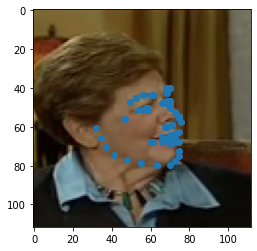

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

data = Image.fromarray(X[26])
plt.imshow(data)
a = np.reshape(Y[26],(136,1))
plt.scatter(a[0::2],a[1::2])
plt.show()

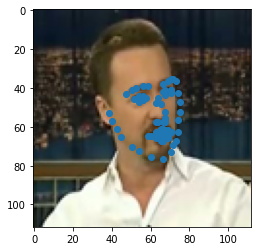

In [ ]:
i = X[17]
plt.imshow(i)
tp = Y[17]
tp = tp.reshape((136,1))
plt.scatter(tp[0::2],tp[1::2])
plt.show()

In [ ]:
import tensorflow as tf
MODEL = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,input_shape = (112,112,3),kernel_size=(3, 3),activation='relu'),
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.Conv2D(256,kernel_size=(3,3),strides = 1,padding = 'valid',activation = 'relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2 ,padding='valid'),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2 ,padding='valid'),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2 ,padding='valid'),
            tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=1 ,padding='valid'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=1024,activation='relu',use_bias=True),
            tf.keras.layers.Dense(units=136,use_bias=True),
])

In [ ]:
MODEL.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mae'])
Y = np.reshape( Y ,(-1, 136)) 
Y = np.asarray(Y).astype('float32')
record = MODEL.fit((X/255.), (Y/112.), batch_size=32 , epochs=500, validation_split=0.15)

Epoch 1/500
83/83 [==============================] - 12s 150ms/step - loss: 0.4129 - mae: 0.1738 - val_loss: 0.0037 - val_mae: 0.0451
Epoch 2/500
83/83 [==============================] - 11s 137ms/step - loss: 0.0035 - mae: 0.0441 - val_loss: 0.0037 - val_mae: 0.0447
Epoch 3/500
83/83 [==============================] - 11s 136ms/step - loss: 0.0036 - mae: 0.0449 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 4/500
83/83 [==============================] - 11s 137ms/step - loss: 0.0036 - mae: 0.0454 - val_loss: 0.0037 - val_mae: 0.0445
Epoch 5/500
83/83 [==============================] - 11s 137ms/step - loss: 0.0035 - mae: 0.0442 - val_loss: 0.0037 - val_mae: 0.0451
Epoch 6/500
83/83 [==============================] - 11s 137ms/step - loss: 0.0035 - mae: 0.0447 - val_loss: 0.0041 - val_mae: 0.0474
Epoch 7/500
83/83 [==============================] - 11s 137ms/step - loss: 0.0036 - mae: 0.0451 - val_loss: 0.0037 - val_mae: 0.0449
Epoch 8/500
83/83 [==============================] - 11s 137ms

In [ ]:
MODEL.save_weights('/content/MODEL.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = record.history['mae']
val_acc = record.history['val_mae']
loss = record.history['loss']
val_loss = record.history['val_loss']

epochs = range(len(acc))

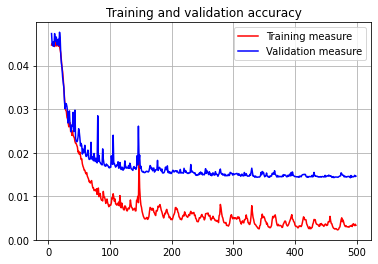

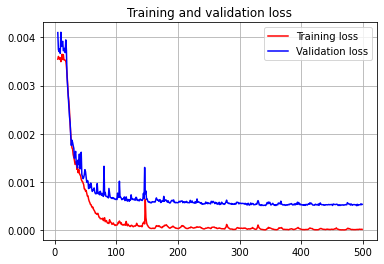

In [ ]:
plt.plot(epochs[5:], acc[5:], 'r', label='Training measure')
plt.plot(epochs[5:], val_acc[5:], 'b', label='Validation measure')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid('on')
plt.figure()
plt.plot(epochs[5:], loss[5:], 'r', label='Training loss')
plt.plot(epochs[5:], val_loss[5:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.grid('on')
plt.show()

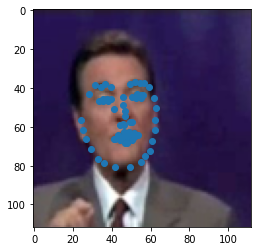

In [ ]:
i = X[10]
t = MODEL.predict(i.reshape(1,112,112,3)/255.)
plt.imshow(i)
tp = t.reshape(136,1)
tp = tp*112
plt.scatter(tp[0::2],tp[1::2])
plt.show()

# TESTING ON SELF 

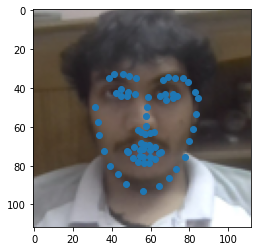

In [ ]:
i = mpimg.imread('test.jpg')
i = Image.fromarray(i)
i = i.resize((112,112))
i = np.array(i)

t = MODEL.predict(i.reshape(1,112,112,3)/255.)
plt.imshow(i)
tp = t.reshape(136,1)
tp = tp*112
plt.scatter(tp[0::2],tp[1::2])
plt.show()

# MICHELANIOUS

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D( 128 , input_shape=(112 , 112 , 3) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.Conv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2D( 136 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 108, 108, 128)     9728      
_________________________________________________________________
batch_normalization_16 (Batc (None, 108, 108, 128)     512       
_________________________________________________________________
activation_16 (Activation)   (None, 108, 108, 128)     0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 104, 104, 128)     409728    
_________________________________________________________________
batch_normalization_17 (Batc (None, 104, 104, 128)     512       
_________________________________________________________________
activation_17 (Activation)   (None, 104, 104, 128)     0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 100, 100, 128)    

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mae'])
Y = np.reshape( Y , ( -1 , 1 , 1 , 136 ))
# X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
record = model.fit((X/255.), (Y/112.), batch_size=32 , epochs=100, validation_split=0.15)

Epoch 1/100
83/83 [==============================] - 49s 595ms/step - loss: 0.0035 - mae: 0.0439 - val_loss: 0.0032 - val_mae: 0.0425
Epoch 2/100
83/83 [==============================] - 50s 596ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 3/100
83/83 [==============================] - 50s 599ms/step - loss: 0.0035 - mae: 0.0439 - val_loss: 0.0032 - val_mae: 0.0429
Epoch 4/100
83/83 [==============================] - 50s 601ms/step - loss: 0.0035 - mae: 0.0440 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 5/100
83/83 [==============================] - 50s 600ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0032 - val_mae: 0.0425
Epoch 6/100
83/83 [==============================] - 50s 599ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0032 - val_mae: 0.0423
Epoch 7/100
83/83 [==============================] - 50s 598ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 8/100
83/83 [==============================] - 50s 598ms